# **Measurement and Mixed States**

A measurement is a central concept in quantum mechanics. An easy way to think about it as a sample from a probability distribution: it is a random variable with a number of outcomes, each outcome is produced with a certain probability. 

Measurement connect the quantum world to our classical one: we cannot directly observe the quantum state in nature, we can only gather statistics about it with measurements. Unless a quantum system is perfectly isolated, it interacts with its surrounding environment. This leads to introduction of mixed states, which in one limit recover classical probabilities.

In [1]:
import numpy as np
zero_ket = np.array([[1], [0]])
print("|0> ket:\n", zero_ket)
print("<0| bra:\n", zero_ket.T.conj())

|0> ket:
 [[1]
 [0]]
<0| bra:
 [[1 0]]


This makes it very easy to write dot products: if we write a bra followed by a ket, that is exactly what the dot product is. This is so common that we often drop one of the vertical bars, and just write $\langle 0|0\rangle$, for instance. Since quantum states are normalized, the inner product of any quantum state with itself is always one:

In [2]:
zero_ket.T.conj().dot(zero_ket)

array([[1]])

Similarly, orthogonal vectors always give 0. E.g. $\langle 0|1\rangle$:

In [3]:
one_ket = np.array([[0], [1]])
zero_ket.T.conj().dot(one_ket)

array([[0]])

Here's a ket and a bra which is a matrix, essentially the outer product of the two vectors: $|0\rangle\langle 0|$:

In [4]:
zero_ket.dot(zero_ket.T.conj())

array([[1, 0],
       [0, 0]])

If the above looks familiar then that is no surprise as this is a projection to the first element of the canonical basis (refer to Chapter 1). It is true in general that $|\psi\rangle\langle\psi|$ is going to be a projector to $|\psi\rangle$. The result is intuitive. If we take some other quantum state $|\phi\rangle$ and apply the matrix $|\psi\rangle\langle\psi|$ on it $|\psi\rangle\langle\psi|\phi\rangle$, we see that the right-most two terms are a bra and a ket and hence it is a dot product which is basically an overlap between $|\phi\rangle$ and $|\psi\rangle$. Since this is a scalar, it  scales the left-most term, which is the ket $|\psi\rangle$, so in effect,  $|\phi \rangle$ got projected on this vector.

## **Measurements**

A measurement in quantum mechanics is an operator-valued random variable. This measurement is in the canonical basis. In other words, the measurement contains two projections, $|0\rangle\langle 0|$ and $|1\rangle\langle 1|$, and this measurement can be applied to any of the qubits of the quantum computer.

We already saw how applying a projection on a vector works. For a scalar value of that, we need to add a bra to the left. For instance, for some state $|\psi\rangle$, we get a scalar for $\langle\psi|0\rangle\langle 0|\psi\rangle$. This is called the expectation value of the operator $|0\rangle\langle 0|$. 

To put this in context, let us apply the projection $|0\rangle\langle 0|$ on the superposition $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, which is the column vector $\frac{1}{\sqrt{2}}\begin{bmatrix} 1\\ 1\end{bmatrix}$.

In [5]:
ψ = np.array([[1], [1]])/np.sqrt(2)
Π_0 = zero_ket.dot(zero_ket.T.conj())
ψ.T.conj().dot(Π_0.dot(ψ))

array([[0.5]])

That is exactly one half, the square of the absolute value of the probability amplitude corresponding to state  $|0\rangle$ in the superposition.  For an equal superposition with the Hadamard gate (please earlier jupyter notebook for quantum circuits in Chapter 4), we need to apply the measurement, and observe the statistics a s is shown in listing:

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


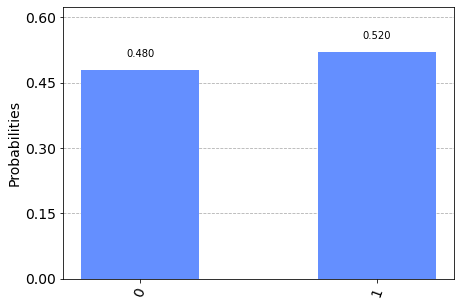

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

The output which, if we run it a few times, it will be noticed is a random output, with roughly half of the outcomes being 0.

However, it is to be noted that even though the measurement has a random outcome,  once it is performed, the quantum state is in the corresponding basis vector. That is, the superposition is destroyed. This is referred to as the collapse of the wavefunction. It is the subject of many ongoing debates and research results how and why it happens, but what matters to us is that we can easily calculate the quantum state after the measurement. Just projecting it to the basis vector is insufficient, since that would not be normalized, so we have to renormalize it. Mathematically it is expressed by the  convoluted expression (Chapter 1)  $\frac{|i\rangle\langle i|\psi\rangle}{\sqrt{\langle\psi|i\rangle\langle i|\psi\rangle}}$. As an example, if we observe zero after measuring the superposition $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, the state after the measurement will be

In [7]:
ψ = np.array([[np.sqrt(2)/2], [np.sqrt(2)/2]])
Π_0 = zero_ket.dot(zero_ket.T.conj())
probability_0 = ψ.T.conj().dot(Π_0.dot(ψ))
Π_0.dot(ψ)/np.sqrt(probability_0)

array([[1.],
       [0.]])

in other words, we get a $|0\rangle$.

This can be seen by putting two measurements in a sequence on the same qubit. The second one will always give the same outcome as the first. The first one is random, but the second one will be determined, since there will be no superposition in the computational basis after the first measurement. Following is a simulation of this formed by writing out the results of the two measurements into two different classical registers:

In [8]:
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q[0], c[0])
circuit.measure(q[0], c[1])
job = execute(circuit, backend, shots=100)
job.result().get_counts(circuit)

{'11': 53, '00': 47}

There is no output like 01 or 10.

## **Measuring multiqubit systems**

Most quantum computers implement local measurements, which means that each qubit is measured separately. So if we have a two qubit system where the first qubit is in the equal superposition and the second one is in $|0\rangle$, that is, we have the state $\frac{1}{\sqrt{2}}(|00\rangle + |01\rangle)$, we will observe 0 and 0 or 0 and 1 as outcomes of the measurements on the two qubits. 

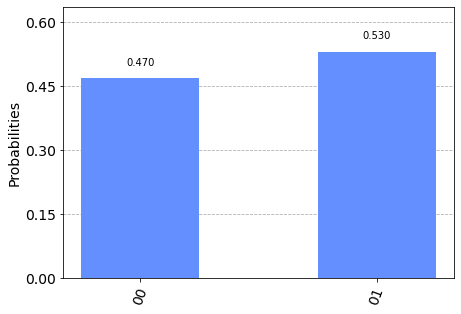

In [9]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

Next, let's make measurements on an entangled state and get the statistics again on the $|\phi^+\rangle$ state:

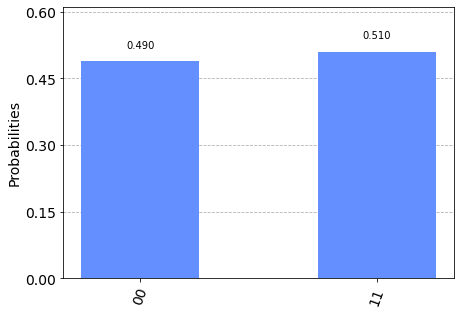

In [10]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q, c)
job = execute(circuit, backend, shots=100)
plot_histogram(job.result().get_counts(circuit))

We only observe 00 and 11. The state is $\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$, and this should not be surprising.  At the end of the last code section, we saw the same statistics, but from measurements on the same qubit. Now we have two, spatially separate qubits exhibiting the same behaviour: this is a very strong form of correlation. This means that if we measure just one qubit, and get, say, 0 as the outcome, we *know* with certainty that if we measured the other qubit, we would also get 0, even though the second measurement is also a random variable.

To appreciate this better, imagine that we are tossing two unbiased coins. If we observe heads on one, there is absolutely nothing that we can say about what the other one might be other than a prediction which holds with a probability of 0.5. If we use biased coins, then we might improve our prediction accuracy. However, still, we can never say with certainty what the other coin will be based on the outcome you observed on one coin.

It is to be noted that there is no activation or instantaneous (faster than the speed of light) signalling happening between the entanglement qubits. The measurement was local to the qubit and so is the information. If there is somebody else doing the measurement on the other qubit, we would have to inform the person through classical communication channels that we happen to know what the outcome will be. So while we certainly cannot violate the theory of relativity with entanglement, this strong form of correlation is still central to many quantum algorithms.

## **Mixed states**

A ket and a bra is a projection, as we explained above. More than that, it is also a density matrix. A density matrix is another way of writing a quantum state, instead of kets. So, for instance we could write $\rho = |\psi\rangle\langle\psi|$, where $\rho$ is the density matrix for $|\psi\rangle$. The Born rule still applies, but now we have to take the trace of the result: for instance, $\mathrm{Tr}[|0\rangle\langle 0|\rho]$ would be the probability of seeing 0. See it in action:

In [11]:
ψ = np.array([[1], [1]])/np.sqrt(2)
ρ = ψ.dot(ψ.T.conj())
Π_0 = zero_ket.dot(zero_ket.T.conj())
np.trace(Π_0.dot(ρ))

0.4999999999999999

We get one half again. The renormalization after a measurement happens in a similar way: $\frac{|0\rangle\langle 0|\rho|0\rangle\langle 0|}{\mathrm{Tr}[|0\rangle\langle 0|\rho]}$.

In [12]:
probability_0 = np.trace(Π_0.dot(ρ))
Π_0.dot(ρ).dot(Π_0)/probability_0

array([[1., 0.],
       [0., 0.]])

Every state so far has been created as a ket and a bra. There are other states called *mixed states*: these are *classical* probability distributions over pure states. 

In [13]:
zero_ket = np.array([[1], [0]])
one_ket = np.array([[0], [1]])
ψ = (zero_ket + one_ket)/np.sqrt(2)
print("Density matrix of the equal superposition")
print(ψ.dot(ψ.T.conj()))
print("Density matrix of the equally mixed state of |0><0| and |1><1|")
print((zero_ket.dot(zero_ket.T.conj())+one_ket.dot(one_ket.T.conj()))/2)

Density matrix of the equal superposition
[[0.5 0.5]
 [0.5 0.5]]
Density matrix of the equally mixed state of |0><0| and |1><1|
[[0.5 0. ]
 [0.  0.5]]


The off-diagonal elements called coherence are gone in the second case. Presence of coherence indicates that the state is quantum. The smaller these values, the closer the quantum state is to a classical probability distribution.

The second density matrix above has only diagonal elements and they are equal: this is the equivalent way of writing a uniform distribution. The uniform distribution has maximum entropy, and for this reason, a density matrix with this structure is called a maximally mixed state. In other words, we are perfectly ignorant of which elements of the canonical basis constitute the state.

We would like a quantum state to be perfectly isolated from the environment, but in reality, the quantum computers we have today and for the next few years cannot achieve a high degree of isolation. So coherences are slowly lost to the environment - this is a process called decoherence. The speed at which this happens determines the length of the quantum algorithms we can run on the quantum computer: if it happens fast, we have time to apply a handful gates or do any other form calculation, and then we quickly have to pull out (measure) the results.